In [1]:
#import pandas
import pandas as pd

#import numpy
import numpy as np

#import matplotlib.pyplot
import matplotlib.pyplot as plt

#for beautiful output
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

In [3]:
plt.style.use('ggplot')

In [4]:
#reading data via pandas read_csv()
data = pd.read_csv("books.csv", delimiter=',')

### all variables of the sample
bookID - A unique Identification number for each book

title - The name under which the book was published

authors - Names of the authors of the book. Multiple authors are delimited with -

average_rating - The average rating of the book received in total

isbn - Another unique number to identify the book, the International Standard Book Number

isbn13 - A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN

language_code - Helps understand what is the primary language of the book. For instance, eng is standard for English

#num_pages - Number of pages the book contains

ratings_count - Total number of ratings the book received

text_reviews_count - Total number of written text reviews the book received

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
#rename just for convenience
data.rename({'average_rating' : 'avr_rate', '# num_pages' : 'num_pages',
             'ratings_count' : 'ratings',
             'language_code' : 'language',
             'text_reviews_count' : 'text_reviews'}, axis = 'columns', inplace = 'True')

In [7]:
#as shown in data.describe() cell, there's some value with 0 pages
#trying to put some minimum value for it
summary = sum(data['num_pages'])
total = len(data['num_pages'])
for i in range(total):
    if (data['num_pages'][i] == 0):
        data['num_pages'][i] = summary/total

D:\3 course\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


##### at least 1 page in the book, not 0
data[data['# num_pages'] == 0] = data['# num_pages'].mean()
##### when I use it my values change a little

In [8]:
#dropping data with NaN value
data = data.drop([10666])

In [9]:
data.describe()

,bookID,avr_rate,num_pages,ratings,text_reviews
count,13718.000000,13718.000000,13718.000000,1.371800e+04,13718.000000
mean,22159.651407,3.930551,344.521213,1.776039e+04,533.478787
std,13699.671611,0.357875,251.164675,1.129411e+05,2528.653867
min,1.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,10620.500000,3.770000,199.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,304.000000,6.300000e+02,40.000000
75%,33311.750000,4.130000,421.000000,4.738500e+03,222.000000
max,47709.000000,5.000000,6576.000000,5.629932e+06,93619.000000


In [10]:
data.isna().sum()

bookID          0
title           0
authors         0
avr_rate        0
isbn            0
isbn13          0
language        0
num_pages       0
ratings         0
text_reviews    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13718 entries, 0 to 13718
Data columns (total 10 columns):
bookID          13718 non-null int64
title           13718 non-null object
authors         13718 non-null object
avr_rate        13718 non-null float64
isbn            13718 non-null object
isbn13          13718 non-null object
language        13718 non-null object
num_pages       13718 non-null int64
ratings         13718 non-null int64
text_reviews    13718 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.2+ MB


#### Dataset cleaned. Now we can start
## Building Scatterplots

###### The simplest way to check for a relationship between two variables is a scatter plot

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

### Here I'll extract the quantity of books ratings and text reviews of the books in the sample.

[-250, 5000, -2000, 100000]

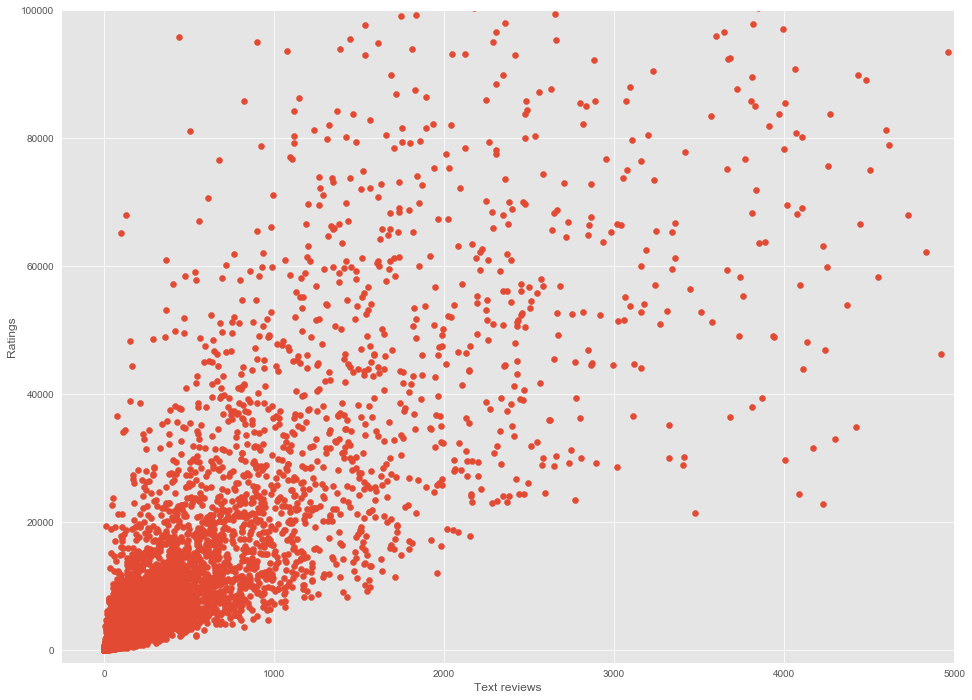

In [13]:
plt.scatter( data.text_reviews, data.ratings, alpha = 1)
plt.xlabel('Text reviews')
plt.ylabel('Ratings')
plt.axis([-250, 5000, -2000, 100000])

### a simple scatter plot with alpha=1, so each data point is fully saturated.

#### Building jitter and swarm plots

Here we can clearly see the power of a swarm plot over a jitter plot. In the jitter plot we have no indication of the density of the data. We can try to improve the jitter plot by increasing the amount of jitter or by adding transparency

Swarm plot (sns.swarmplot())is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

The major differences between a jitter and swarm plot are that in the swarm plot the values are not overlapping (unless there are too many points), and we can more easily see which values occur more often.

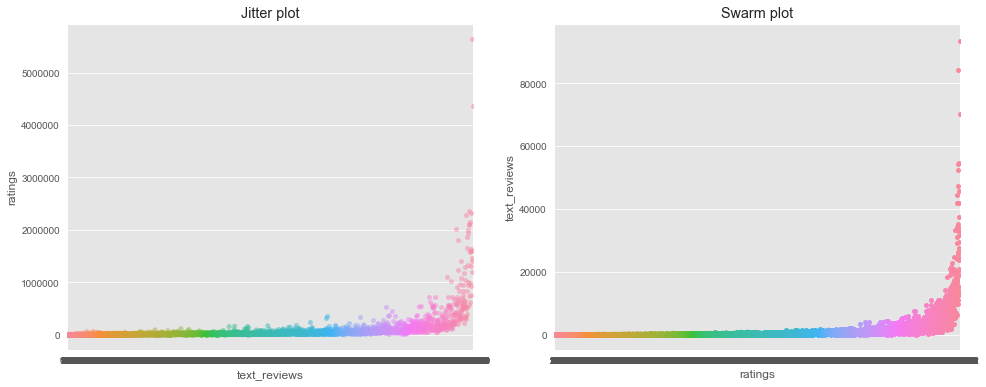

In [17]:
# Set up a figure with two axes
fig, ax = plt.subplots(1, 2)

# Set the size of the figure
fig.set_size_inches(16, 6)

# Label the axes and title the plot
ax[0].set_xlabel('Text reviews')
ax[0].set_ylabel('Ratings')
ax[0].set_title('Jitter plot')

# Make a jitter plot
sns.stripplot(data.text_reviews, data.ratings, ax=ax[0], jitter=0.2, alpha=0.5)

# Label the axes and title the plot
ax[1].set_xlabel('Text reviews')
ax[1].set_ylabel('Ratings')
ax[1].set_title('Swarm plot')

# Make a swarm plot
sns.swarmplot(data.ratings, data.text_reviews, ax=ax[1]);

### When an amount of data is too large we can use hexbin plot
A hexbin plot divides the graph into
hexagonal bins and colors each bin
according to how many data points fall in
it
A drawback is that it makes the outliers
invisible

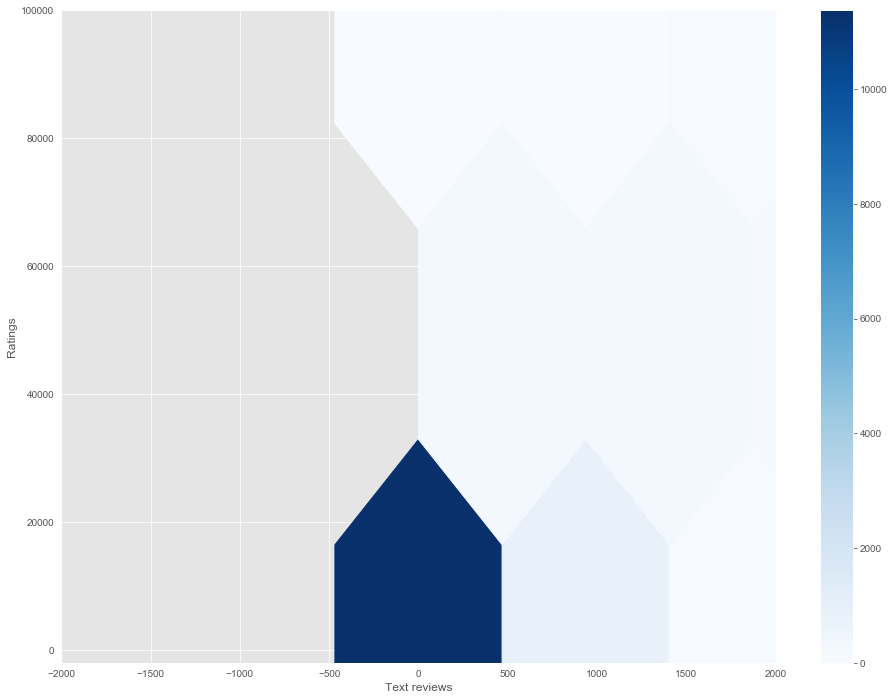

In [14]:
plt.hexbin( data.text_reviews, data.ratings, cmap = 'Blues')
plt.xlabel('Text reviews')
plt.ylabel('Ratings')
plt.axis([-2000, 2000, -2000, 100000])
plt.colorbar()

## Plotting percentiles

Sometimes a better way to get a sense of the relationship between variables is to divide the dataset into groups using one variable, and then plot percentiles of the other variable.

First I'll drop any rows that are missing ratings or text reviews of books.
Even if it doesn't have any, just for being sure

In [15]:
cleaned = data.dropna(subset=['ratings', 'text_reviews'])

Then I'll divide the dataset into groups by ratings

In [18]:
bins = np.arange(135, 210, 5)
indices = np.digitize(cleaned.ratings, bins)
groups = cleaned.groupby(indices)

#### Here are the number of books in each group

In [19]:
for i, group in groups:
    print(i, len(group))

0 4165
1 46
2 52
3 43
4 47
5 48
6 54
7 54
8 55
9 52
10 54
11 50
12 44
13 36
14 43
15 8875


#### Now we can compute the CDF of text reviews within each group.

D:\3 course\anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.90086018, 0.94437965, 0.9620936 , 0.97069544, 0.97696457,
        0.98141128, 0.98476454, 0.98644117, 0.98855518, 0.99001312,
        0.99139816, 0.99256451, 0.99329348, 0.99387666, 0.99438694,
        0.99540749, 0.99599067, 0.99635515, 0.99650095, 0.99679254,
        0.99722992, 0.99744861, 0.9976673 , 0.9977402 , 0.99781309,
        0.99795889, 0.99810468, 0.99817758, 0.99832337, 0.99839627,
        0.99839627, 0.99854206, 0.99854206, 0.99868786, 0.99876075,
        0.99890655, 0.99905234, 0.99912524, 0.99912524, 0.99919813,
        0.99919813, 0.99919813, 0.99919813, 0.99919813, 0.99934393,
        0.99934393, 0.99934393, 0.99941682, 0.99948972, 0.99948972,
        0.99956262, 0.99956262, 0.99956262, 0.99956262, 0.99956262,
        0.99956262, 0.99963552, 0.99963552, 0.99978131, 0.99978131,
        0.99978131, 0.99978131, 0.99978131, 0.99978131, 0.99978131,
        0.99978131, 0.99978131, 0.99978131, 0.99978131, 0.99978131,
        0.99978131, 0.99978131, 0.99978131, 0.99

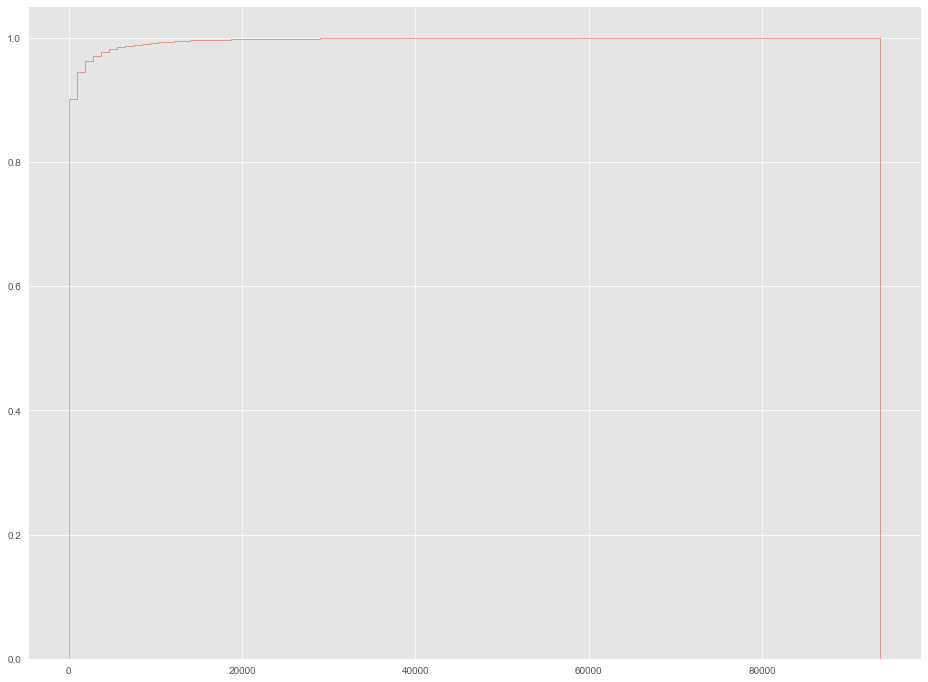

In [27]:
plt.hist(data.text_reviews.dropna(),normed = True, cumulative= True, histtype='step', bins = 100) 

## Correlation

#### The following function computes the covariance of two variables using NumPy's dot function.

In [28]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [29]:
r, t = cleaned.ratings, cleaned.text_reviews
Cov(r, t)

246579059.01514655

#### Covariance is useful for some calculations, but it doesn't mean much by itself. The coefficient of correlation is a standardized version of covariance that is easier to interpret.

In [32]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx = xs.mean()
    varx = xs.var()
    meany = ys.mean() 
    vary = ys.var()

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [33]:
Corr(r, t)

0.863468124254894

#### The correlation of ratings and text reviews is about 0.86, which is a moderately strong correlation


#### NumPy provides a function that computes correlations, too:

In [34]:
np.corrcoef(r, t)

array([[1.        , 0.86346812],
       [0.86346812, 1.        ]])

##### The result is a matrix with self-correlations on the diagonal (which are always 1), and cross-correlations on the off-diagonals (which are always symmetric).

##### Pearson's correlation is not robust in the presence of outliers, and it tends to underestimate the strength of non-linear relationships.

##### Spearman's correlation is more robust, and it can handle non-linear relationships as long as they are monotonic. Here's a function that computes Spearman's correlation:

In [35]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

#### Spearman's correlation is a little higher:

In [36]:
SpearmanCorr(r, t)

0.9604347355706648